<a href="https://colab.research.google.com/github/TranThu1208/my-ciu-tui-voi/blob/master/1_Working_with_Spark_Data_Visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Information

# Preparing data

In [ ]:
from pyspark.sql import SparkSession
spark=SparkSession.builder.appName("5. Spark - Data Visualizations").getOrCreate()
file_location = "Small_ASOF_Quotes_Transactions.csv"
file_type = "csv"
infer_schema = "False"
first_row_is_header = "True"
df_Transactions = spark.read.format(file_type) \
.option("header", first_row_is_header) \
.load(file_location)
m = df_Transactions.count()
print("Number of rows:",m)
df_Transactions.show(126)

23/12/19 15:24:57 WARN Utils: Your hostname, m resolves to a loopback address: 127.0.1.1; using 10.0.2.15 instead (on interface enp0s3)
23/12/19 15:24:57 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/12/19 15:24:58 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
23/12/19 15:25:00 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


Number of rows: 126
+------+----------+----------+-----------+-----------+
|Symbol|  event_ts|    mod_dt|     bid_pr|     ask_pr|
+------+----------+----------+-----------+-----------+
|   ATR|2018-08-31|2018-08-31|346.6599607|349.6215759|
|  EMIS|2017-08-31|2017-08-31|345.0486198|351.9234106|
|  UBER|2020-08-31|2020-08-31|346.4629124|350.5824222|
|  EMIS|2019-08-31|2019-08-31|345.2979018| 349.730435|
|   ATR|2017-08-31|2017-08-31| 346.020218|348.4451085|
|  EMIS|2019-08-30|2019-08-30| 347.123199|351.7255773|
|   ATR|2017-08-28|2017-08-28|347.4956773|352.5650215|
|  EMIS|2020-08-31|2020-08-31|347.6834562|350.1601094|
|   AMH|2017-08-31|2017-08-31|348.3106306|351.4807103|
|  EMIS|2019-08-31|2019-08-31|344.4819347|348.4434439|
|  UBER|2017-08-31|2017-08-31|348.4910013|349.5556946|
|  EMIS|2018-08-31|2018-08-31|345.3242221|351.3218536|
|   AMH|2017-08-30|2017-08-30|343.5243215|349.8892576|
|   FTS|2019-08-31|2019-08-31|345.1007562|351.8194511|
|   ATR|2020-08-31|2020-08-31|346.0003385|349

In [ ]:
df=df_Transactions
#Importing necessary libraries
from pyspark.sql.types import *
#Identifying and assigning lists of variables
float_vars=['bid_pr', 'ask_pr']
#Converting variables
date_vars=['event_ts','mod_dt']
#Converting variables
for column in float_vars:
 df=df.withColumn(column,df[column].cast(FloatType()))
for column in date_vars:
 df=df.withColumn(column,df[column].cast(DateType()))
df.dtypes


[('Symbol', 'string'),
 ('event_ts', 'date'),
 ('mod_dt', 'date'),
 ('bid_pr', 'float'),
 ('ask_pr', 'float')]

In [ ]:
# Step 1: Importing the required libraries
%matplotlib inline
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
# Step 2: Processing the data in Spark. We can use the histogram function from the RDD
histogram_data = df\
.select('bid_pr').rdd.flatMap(lambda x: x).histogram(25)

In [ ]:
# Step 3: Loading the Computed Histogram into a pandas DataFrame for plotting
hist_df=pd.DataFrame(list(zip(*histogram_data)), columns=['Bid_pr','Frequency'])

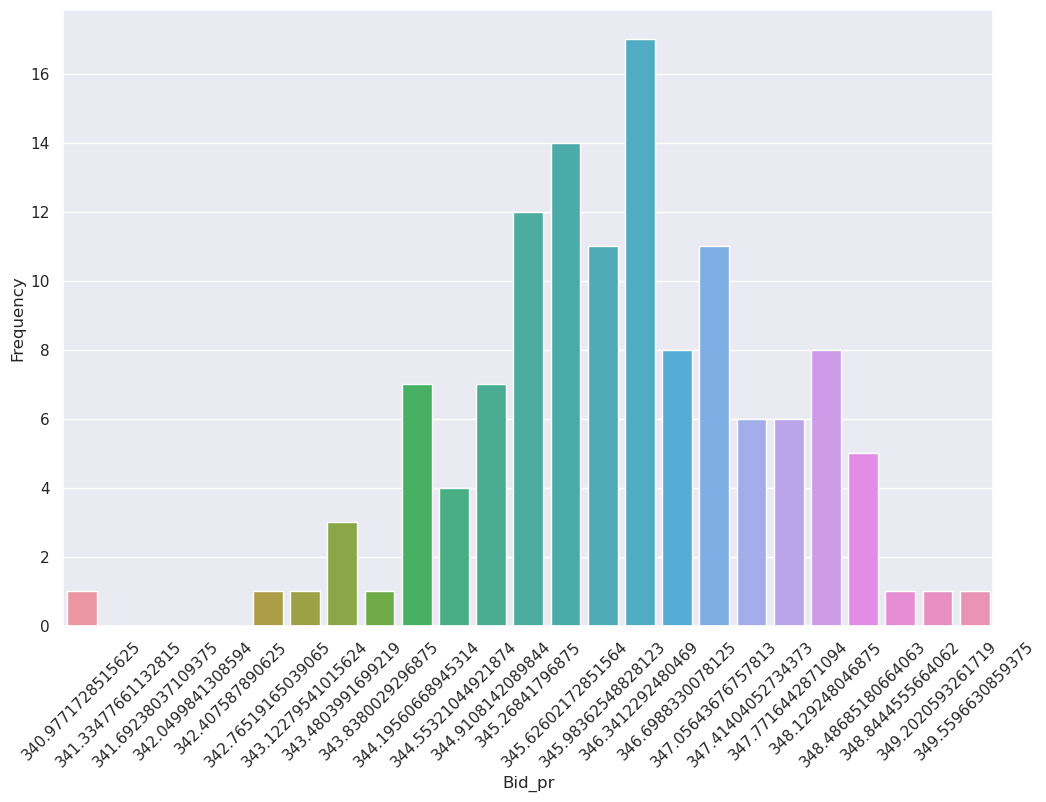

In [ ]:
# Step 4: Plotting the data
sns.set(rc={"figure.figsize": (12, 8)})
# sns.barplot(hist_df['Bid_pr'],hist_df['Frequency'],data = hist_df)
sns.barplot(x = hist_df['Bid_pr'], y = hist_df['Frequency'])
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Filtering the data to get a better understanding of data
df_fil=df.filter('Bid_pr>=344')
df_fil.show()

+------+----------+----------+---------+---------+
|Symbol|  event_ts|    mod_dt|   bid_pr|   ask_pr|
+------+----------+----------+---------+---------+
|   ATR|2018-08-31|2018-08-31|346.65997|349.62158|
|  EMIS|2017-08-31|2017-08-31| 345.0486| 351.9234|
|  UBER|2020-08-31|2020-08-31|346.46292|350.58243|
|  EMIS|2019-08-31|2019-08-31| 345.2979|349.73044|
|   ATR|2017-08-31|2017-08-31|346.02023| 348.4451|
|  EMIS|2019-08-30|2019-08-30| 347.1232| 351.7256|
|   ATR|2017-08-28|2017-08-28|347.49567|352.56503|
|  EMIS|2020-08-31|2020-08-31|347.68344| 350.1601|
|   AMH|2017-08-31|2017-08-31|348.31064| 351.4807|
|  EMIS|2019-08-31|2019-08-31|344.48193|348.44345|
|  UBER|2017-08-31|2017-08-31|  348.491| 349.5557|
|  EMIS|2018-08-31|2018-08-31|345.32422|351.32184|
|   FTS|2019-08-31|2019-08-31|345.10077|351.81946|
|   ATR|2020-08-31|2020-08-31|346.00034|349.57452|
|   FTK|2017-08-31|2017-08-31| 348.2727|351.40796|
|   ATR|2018-08-31|2018-08-31|347.92776|347.50626|
|  EMIS|2017-08-31|2017-08-31|3

In [ ]:
# Processing the data in Spark. We can use the histogram function from the RDD
histogram_data = df_fil.select('Bid_pr')\
.rdd.flatMap(lambda x:x).histogram(15)

In [ ]:
# Loading the computed histogram into a pandas DataFrame for plotting
hist_df=pd.DataFrame(list(zip(*histogram_data)), columns=['Bid_pr','Frequency'])

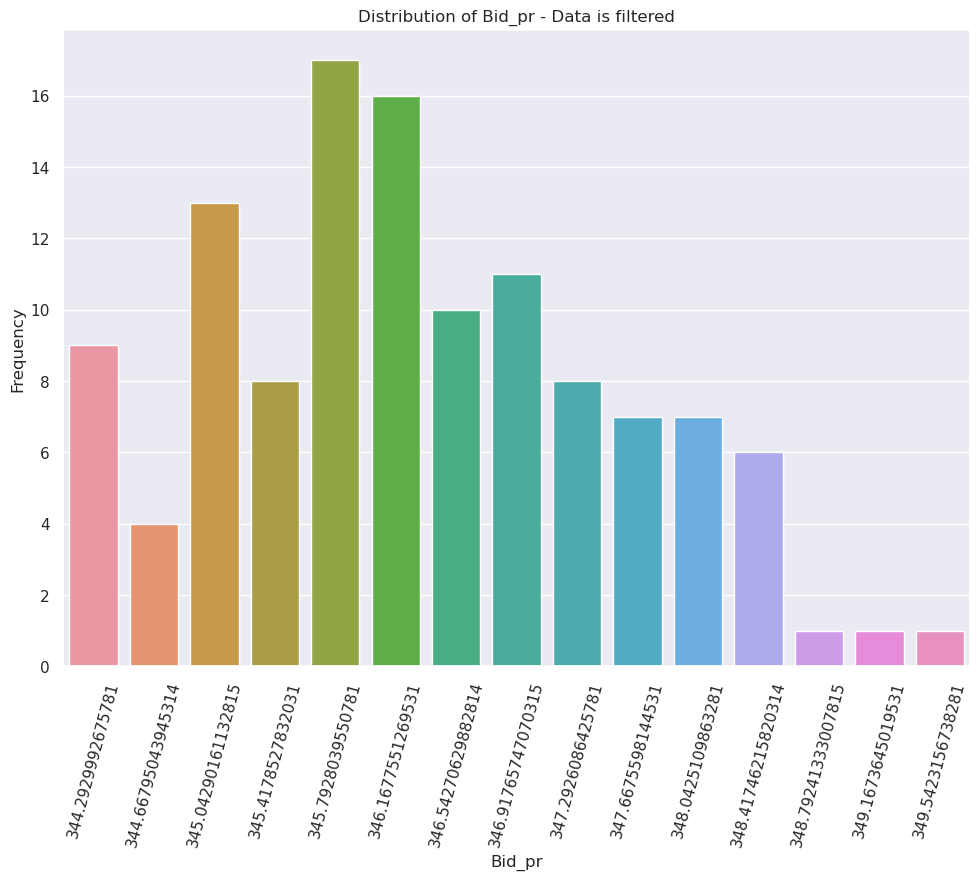

In [ ]:
# Plotting the data
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x = hist_df['Bid_pr'],y = hist_df['Frequency'])
plt.xticks(rotation=75)
plt.title('Distribution of Bid_pr - Data is filtered')
plt.show()

How many transactions between 2017 and 2021 by the year in our dataset?

In [ ]:
from pyspark.sql.functions import year
# # Step 1: Preparing the data using Spark functions and converting to pandas DataFrame
df_temp=df.withColumn('Year_Event_ts',year('event_ts'))
df_temp.show(5)
df_cat=df_temp.filter("(Year_Event_ts>=2017) and (Year_Event_ts<=2021)").\
groupby('Year_Event_ts').count().toPandas()
print(df_cat)

+------+----------+----------+---------+---------+-------------+
|Symbol|  event_ts|    mod_dt|   bid_pr|   ask_pr|Year_Event_ts|
+------+----------+----------+---------+---------+-------------+
|   ATR|2018-08-31|2018-08-31|346.65997|349.62158|         2018|
|  EMIS|2017-08-31|2017-08-31| 345.0486| 351.9234|         2017|
|  UBER|2020-08-31|2020-08-31|346.46292|350.58243|         2020|
|  EMIS|2019-08-31|2019-08-31| 345.2979|349.73044|         2019|
|   ATR|2017-08-31|2017-08-31|346.02023| 348.4451|         2017|
+------+----------+----------+---------+---------+-------------+
only showing top 5 rows

   Year_Event_ts  count
0           2018     31
1           2019     20
2           2020      5
3           2017     68
4           2021      2


In [ ]:
# Step 2: Sorting the values for display
df_cat=df_cat.sort_values(by=['Year_Event_ts'], ascending=False)

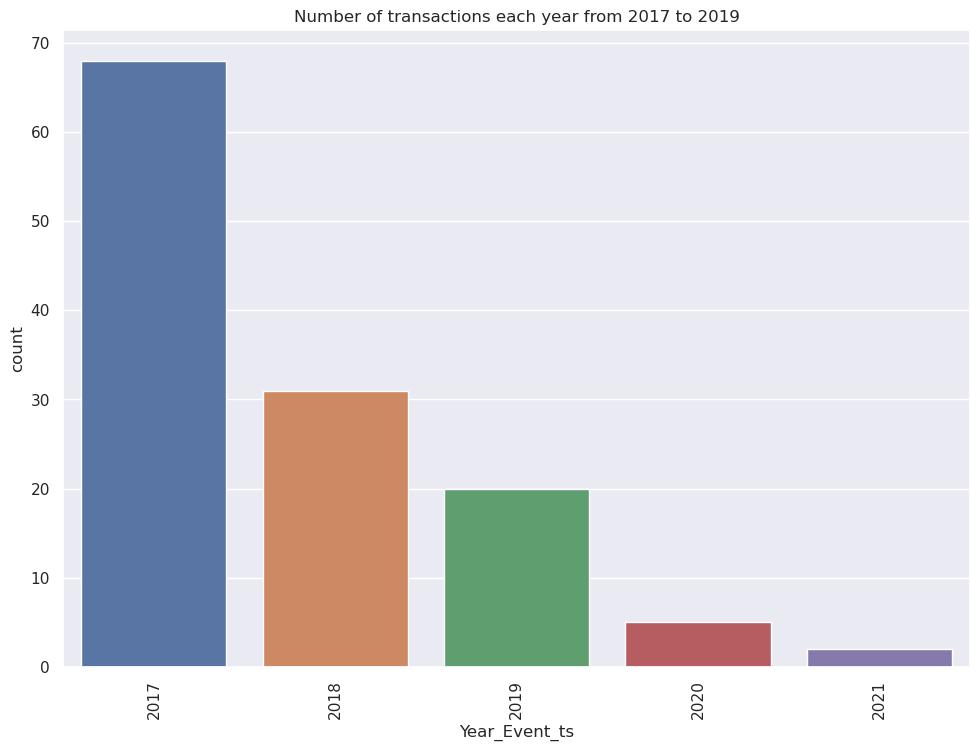

In [ ]:
# Step 3: Plotting the data
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.barplot(x = df_cat['Year_Event_ts'],y = df_cat['count'])
plt.xticks(rotation=90)
plt.title('Number of transactions each year from 2017 to 2019')
plt.show()